In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [92]:
cc_data = pd.read_csv('/Users/nayoneekapaul/Documents/CODSOFT/Credit_Card_Fraud_detect/creditcard.csv')

In [93]:
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [94]:
cc_data.shape

(284807, 31)

In [95]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [96]:
cc_data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

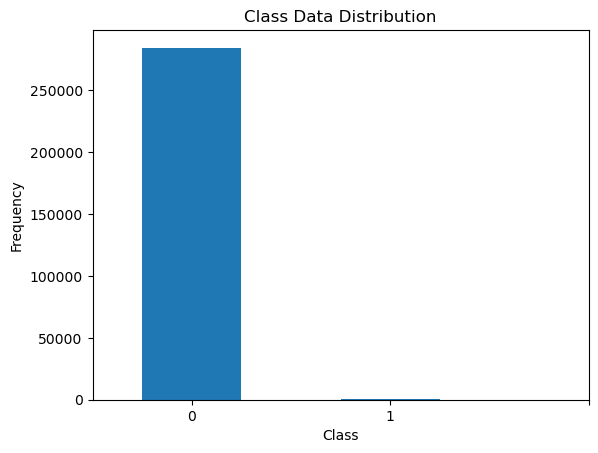

In [97]:
class_counts = cc_data['Class'].value_counts()

class_counts.plot(kind = 'bar', rot = 0)

plt.title("Class Data Distribution")

plt.xticks(range(3))

plt.xlabel('Class')

plt.ylabel('Frequency')


In [98]:
class_counts 

Class
0    284315
1       492
Name: count, dtype: int64

In [99]:
# from here we conclude that the dataset is highly imbalaced.
# 0--> normal transaction.     1--> fraud transaction

In [100]:
fraud = len(cc_data[cc_data.Class == 1])
legit = len(cc_data[cc_data.Class == 0])

In [101]:
fraud_percent = (fraud/(fraud + legit))*100
fraud_percent

0.1727485630620034

In [102]:
fraud = cc_data[cc_data.Class == 1]
legit = cc_data[cc_data.Class == 0]

In [103]:
print(fraud.shape)
print(legit.shape)

(492, 31)
(284315, 31)


In [104]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [105]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

/var/folders/sx/t9vt37b513136n47lyz7nc9w0000gn/T/ipykernel_52230/1974055949.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1 = sns.distplot(fraud.Amount, ax = axs[0])
/var/folders/sx/t9vt37b513136n47lyz7nc9w0000gn/T/ipykernel_52230/1974055949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot

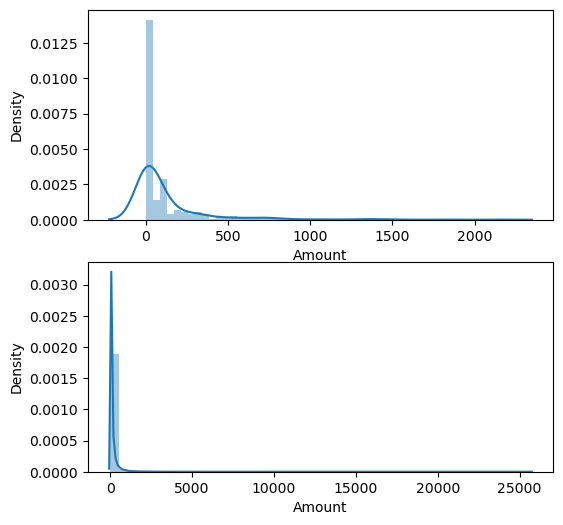

In [106]:
fig,axs = plt.subplots(2, figsize = (6,6))
plt1 = sns.distplot(fraud.Amount, ax = axs[0])
plt2 = sns.distplot(legit.Amount, ax = axs[1])



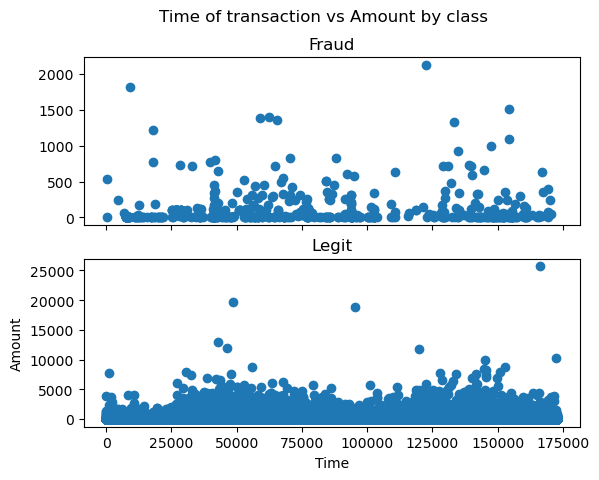

In [107]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Legit')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [108]:
cc_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [109]:
fraud = cc_data[cc_data.Class == 1]
legit = cc_data[cc_data.Class == 0]
outlier_fraction = len(fraud)/float(len(legit))
outlier_fraction

0.0017304750013189597

In [110]:
print("Fraud Cases : {}".format(len(fraud)))

print("Legit Cases : {}".format(len(legit)))

Fraud Cases : 492
Legit Cases : 284315


In [111]:
cc_data1= cc_data.sample(frac = 0.1,random_state=1)

cc_data1.shape

(28481, 31)

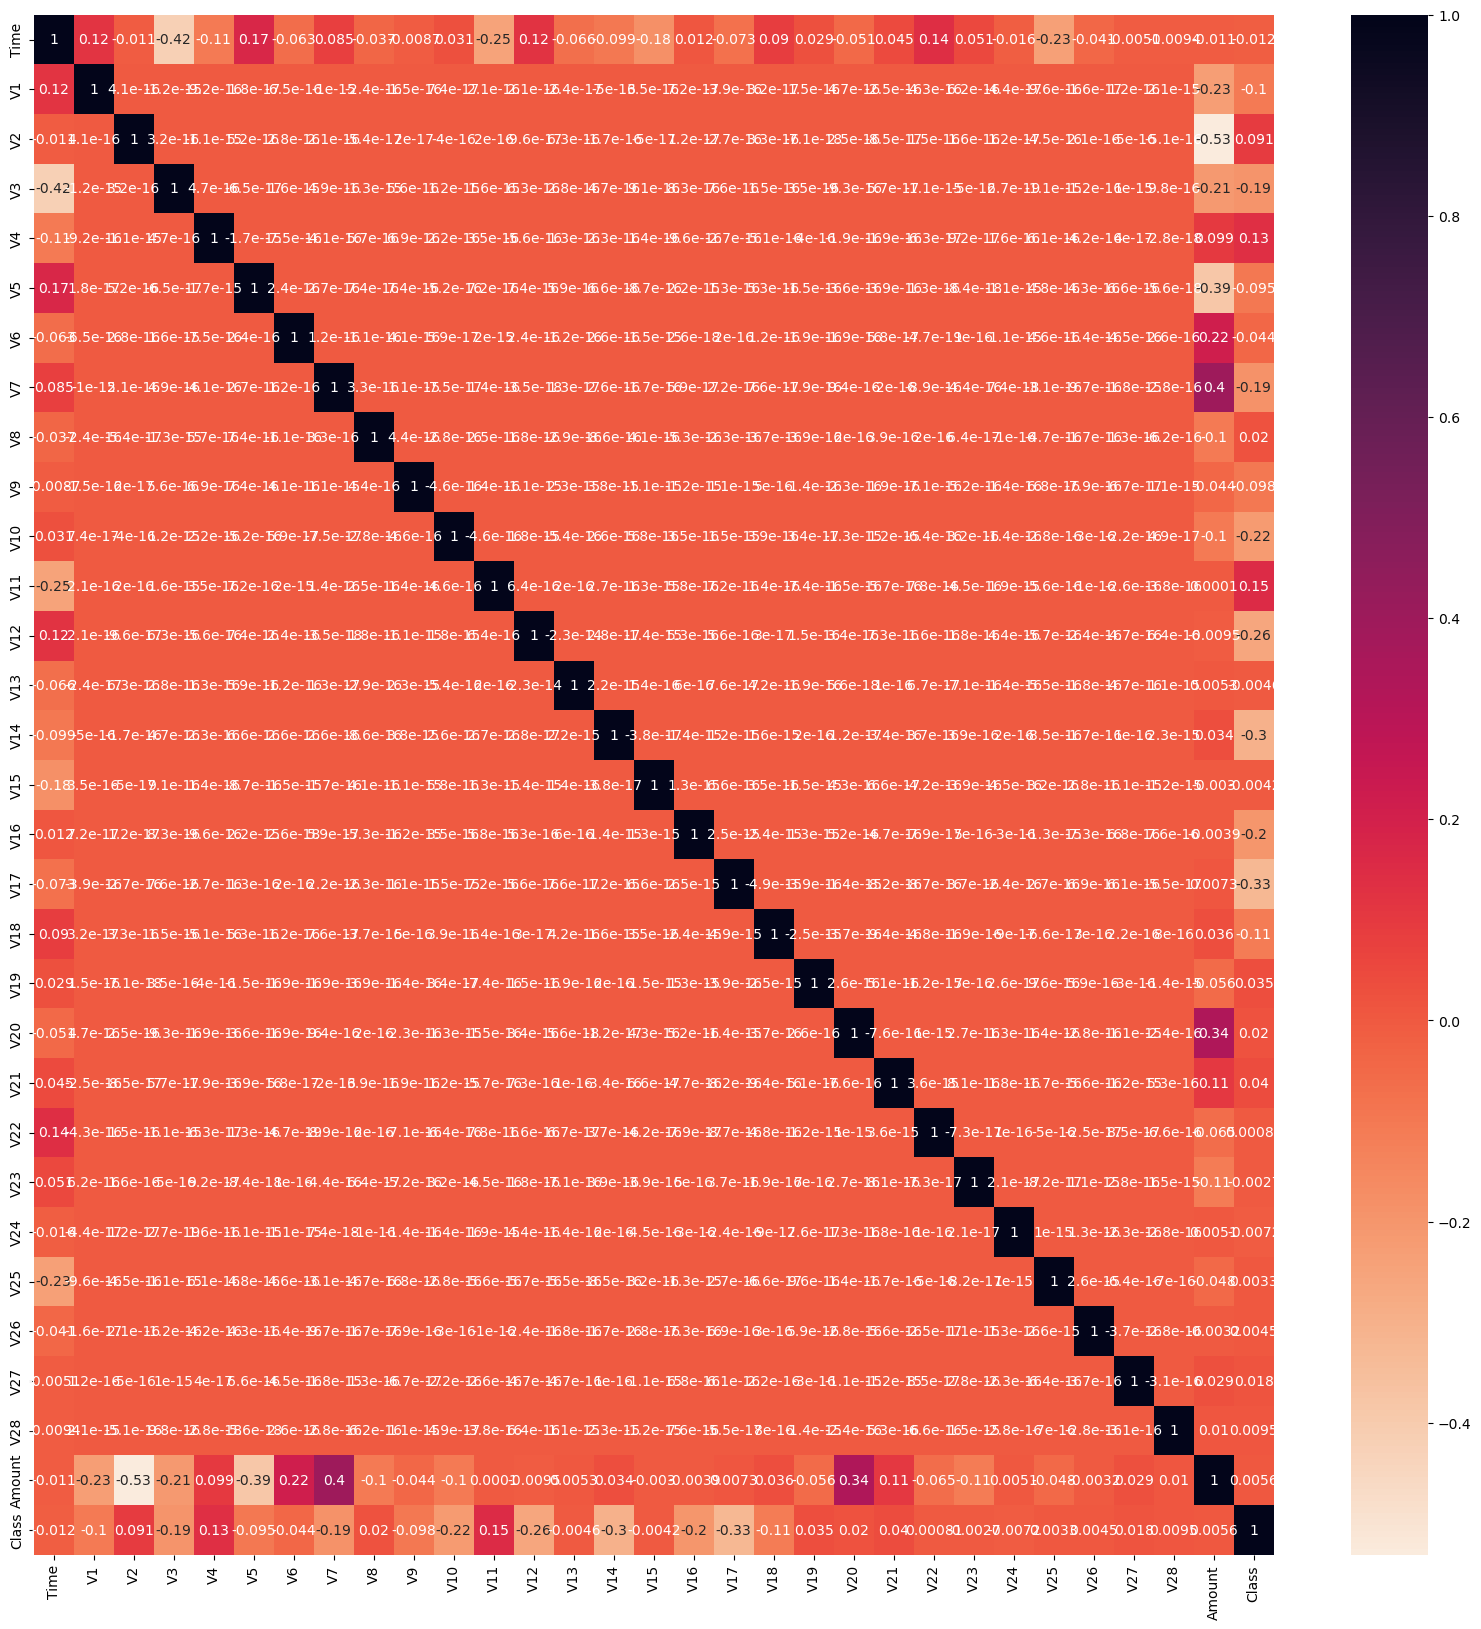

In [112]:
corr_mat = cc_data1.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(20,20))
h_map=sns.heatmap(cc_data[top_corr_features].corr(),annot=True,cmap="rocket_r")

In [113]:
legit_sample = legit.sample(n=492)

In [114]:
new_cc_data = pd.concat([legit_sample, fraud], axis=0)

In [115]:
new_cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
250870,155108.0,-0.594832,0.792988,1.082831,-0.454402,-0.478127,-0.273676,-0.159301,0.680275,-0.032765,...,-0.125178,-0.410806,0.092089,-0.018256,-0.242527,0.007454,0.081385,-0.059429,10.00,0
267082,162603.0,-1.493918,1.903560,-1.828727,-0.680007,0.456304,0.492522,-0.388156,1.660356,-0.125413,...,-0.190796,-0.581754,0.359182,-0.468378,-0.494779,0.226529,0.113089,-0.004810,8.94,0
125733,77777.0,1.166249,0.000914,-0.337438,0.900959,0.736237,1.154660,-0.001547,0.218149,0.107176,...,-0.136588,-0.263039,-0.326468,-1.680922,0.857526,-0.228185,0.027841,-0.004144,48.53,0
189810,128571.0,-0.152703,1.447414,1.220051,3.986638,1.170084,1.742396,0.762449,-0.064764,-1.929400,...,-0.448477,-1.095159,0.049257,-1.448339,-0.933333,-0.181672,-0.194602,-0.040653,37.17,0
5795,6218.0,-0.118651,-0.113796,2.143746,-0.702922,-1.087093,0.248096,-0.814130,0.237576,0.519827,...,0.305770,1.096381,-0.158215,-0.029327,-0.539411,-0.084274,0.165921,0.146390,21.00,0


In [116]:
new_cc_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [117]:
new_cc_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95407.123984,-0.045052,0.075801,-0.056900,-0.038786,0.080798,-0.079736,0.098706,-0.063819,0.045611,...,-0.048845,0.013156,-0.051369,0.006252,-0.012619,-0.006975,-0.006987,-0.015277,0.012539,80.788699
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [134]:
X1 = new_cc_data.drop(columns='Class', axis=1)
y1 = new_cc_data['Class']

In [135]:
type(X1)

pandas.core.frame.DataFrame

In [136]:
X1 = new_cc_data.drop(columns='Class', axis=1).values
y1 = new_cc_data['Class'].values

In [137]:
type(X1)

numpy.ndarray

In [138]:
X1

array([[ 1.55108000e+05, -5.94832433e-01,  7.92987962e-01, ...,
         8.13852087e-02, -5.94286314e-02,  1.00000000e+01],
       [ 1.62603000e+05, -1.49391804e+00,  1.90356015e+00, ...,
         1.13089180e-01, -4.80992375e-03,  8.94000000e+00],
       [ 7.77770000e+04,  1.16624889e+00,  9.14229421e-04, ...,
         2.78408017e-02, -4.14373485e-03,  4.85300000e+01],
       ...,
       [ 1.69351000e+05, -6.76142671e-01,  1.12636606e+00, ...,
         3.85107449e-01,  1.94361479e-01,  7.78900000e+01],
       [ 1.69966000e+05, -3.11383161e+00,  5.85864172e-01, ...,
         8.84875540e-01, -2.53700319e-01,  2.45000000e+02],
       [ 1.70348000e+05,  1.99197610e+00,  1.58475887e-01, ...,
         2.98758224e-03, -1.53088128e-02,  4.25300000e+01]])

In [139]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, random_state = 0)

In [140]:
X1_test.shape

(197, 30)

In [141]:
y1_test.shape

(197,)

In [143]:
sdc = StandardScaler()
X1_train = sdc.fit_transform(X1_train)
X1_test = sdc.fit_transform(X1_test)

In [144]:
lr = LinearRegression()
lr.fit(X1_train, y1_train)

LinearRegression()

In [145]:
y1_pred= lr.predict(X1_test)
y1_pred

array([ 0.00889122,  0.91135407,  0.5062409 ,  0.94227098,  0.64874172,
        0.12700064,  0.13717898,  0.97470383,  1.01644357,  1.10130241,
        0.09219022,  0.99191692, -0.08110859,  0.15392574,  0.66801734,
        0.14136566,  0.97110617,  0.52172823,  0.23413063,  0.34329615,
        0.21413099,  1.12484186,  0.22609571,  0.57648851, -0.22126439,
        0.09640541,  0.03350522,  0.29158007,  0.60764602,  1.1104598 ,
       -0.00608841,  1.09777273,  1.27636164,  1.5487003 , -0.00394832,
       -0.04366643, -0.03310917,  0.43668052,  0.18218983,  0.39373997,
        0.20421604,  0.89960175,  1.04928572,  0.45678644,  1.35850969,
        1.24800642, -0.20273056, -0.04841568,  0.1318859 ,  0.44648715,
        0.45658254,  0.01979524,  1.01113396,  0.8034901 ,  0.0114176 ,
        0.00558173,  1.27018362,  1.20702959,  0.00287212,  0.41727499,
        0.22378241,  0.49470282,  0.06969292,  0.9181635 ,  1.33290135,
        0.78224555,  0.20268657,  1.00016939,  0.9503734 ,  0.34

In [146]:
y1_test

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [147]:
X1_test

array([[ 0.64107226,  0.79727901, -0.67834462, ..., -0.13157926,
        -0.34290114, -0.43069134],
       [-1.55615235, -0.49059959,  0.36839146, ..., -1.93160617,
         1.40484519, -0.43087009],
       [-0.25292625, -0.10733045,  0.87065695, ...,  1.26230597,
         1.42055135, -0.42768836],
       ...,
       [ 0.90422588,  0.41917593, -0.18852538, ...,  0.22955661,
         0.28614801, -0.34085227],
       [-0.83166871,  0.31791517, -0.11494657, ..., -0.20051828,
        -0.16796604, -0.42729512],
       [ 0.99873822,  0.64139008,  0.52933466, ...,  0.48038655,
         0.70154667, -0.43087009]])

In [148]:
accuracy = r2_score(y1_test, y1_pred)
accuracy

0.5906731835467249